# Week 9

Given an infinite set of steps and a fair coin with a value of either $1$ or $2$, investigate the probability of stepping on the number $25$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math

### Code for Method 1

In [2]:
#let us write just a function that sums all the possible entries
def sum_binomial_coefficients(n):
    total = 0
    for i in range(n + 1):
        total += math.comb(n, i)
    return total

# return a vector with all possible outcomes for each step of the function
result = []
for i in range(12,25):
    result.append(sum_binomial_coefficients(i))
print("Sum of binomial coefficients:", result)
#print(len(result))

Sum of binomial coefficients: [4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216]


In [3]:
def build_vector():
    vector = []
    n = 12
    k = 12
    while n <= 24 and k >= 0:
        vector.append(math.comb(n, k))
        n += 1
        k -= 1
    return vector

# Build the vector
success = build_vector()
print("Vector of binomial coefficients:", success)
#print(len(success))

Vector of binomial coefficients: [1, 78, 1001, 5005, 12870, 19448, 18564, 11628, 4845, 1330, 231, 23, 1]


In [4]:
from fractions import Fraction
prob = [0 for i in range(13)]
for i in range(13):
    prob[i]= success[i]/result[i]
    print(Fraction(prob[i]))
print(Fraction(sum(prob)))

1/4096
39/4096
1001/16384
5005/32768
6435/32768
2431/16384
4641/65536
2907/131072
4845/1048576
665/1048576
231/4194304
23/8388608
1/16777216
11184811/16777216


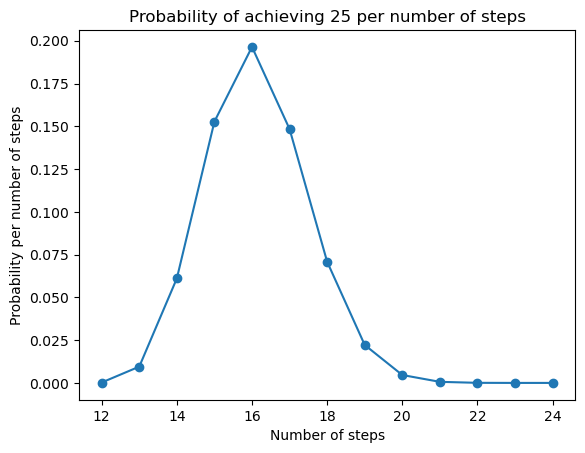

In [5]:
def probability_of_sum(n):
    # Initialize probabilities
    probabilities = [0] * (24 * n + 1)
    probabilities[0] = 1  # Starting from sum 0 with probability 1

    # Update probabilities iteratively
    for _ in range(n):
        new_probabilities = [0] * (24 * n + 1)
        for i in range(len(probabilities)):
            if i + 1 <= 24 * n:
                new_probabilities[i + 1] += probabilities[i] / 2  # Add 1 with probability 1/2
            if i + 2 <= 24 * n:
                new_probabilities[i + 2] += probabilities[i] / 2  # Add 2 with probability 1/2
        probabilities = new_probabilities

    # Calculate probability of reaching 24
    total_probability = sum(probabilities)
    probability_24 = probabilities[24]

    return probability_24 / total_probability

# build an array plotting the probabilities as number of steps increases
x_axis = [i for i in range(12,25)]
y_axis = [probability_of_sum(n) for n in x_axis]

#check values
#print(y_axis)
#print(x_axis)

#plot values
plt.plot(x_axis, y_axis, marker = "o")
plt.title("Probability of achieving 25 per number of steps")
plt.xlabel("Number of steps")
plt.ylabel("Probability per number of steps")
plt.show()

In [6]:
#maybe write another code that shows what is the probability of achieving the nth step 
def build_vector(n):
    vector = []
    j = n//2
    k = n//2
    while j <= n and k >= 0:
        vector.append(math.comb(j, k))
        j += 1
        k -= 1
    return vector

# Build the vector
n = 24
success = build_vector(n)
print("Vector of binomial coefficients:", success)

Vector of binomial coefficients: [1, 78, 1001, 5005, 12870, 19448, 18564, 11628, 4845, 1330, 231, 23, 1]


### Code for Method 2
Code to justify the conjecture for $n = 25$ and to calculate the values for latger $n$

In [7]:
def calculate_probabilities(steps):
    # Initialize probabilities
    probabilities = [0] * (steps+1)
    probabilities[1] = 1  # Starting from step 1 with probability 1

    # Update probabilities iteratively
    for i in range(2, steps + 1):
        probabilities[i] = (probabilities[i - 1] / 2) + (probabilities[i - 2] / 2)

    return probabilities

# Example usage
n =50
steps = n  # Number of steps
probabilities = calculate_probabilities(steps)

#build a vector with the probabilities of each step
x_axis = [0 for i in range(n+1)]
#print(len(x_axis))
y_axis = [0 for i in range(n+1)]

for i, prob in enumerate(probabilities):
    # Print probabilities
    #print("Probability of outcome", i, "at step", i, ":", Fraction(prob))
    x_axis[i] = i
    y_axis[i] = prob

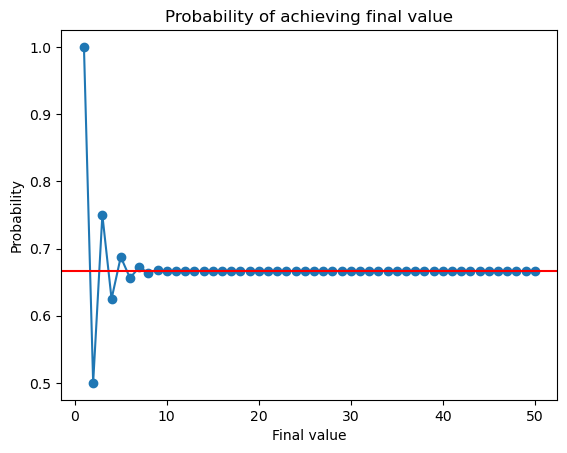

In [8]:
#plot values
plt.plot(x_axis[1:], y_axis[1:], marker = "o")
plt.axhline(2/3, color = "red")
plt.title("Probability of achieving final value")
plt.xlabel("Final value")
plt.ylabel("Probability")
plt.show()